## 5. Improving A Model
* `From a data perspective`
    * could we collect more Data?
    * could we improve our Data?
* `From a model perspective`
    * Is there a better model that we can use?
    * Could we improve our current model?
* `Hyperparameters Vs Parameters`
    * Parameters = model finds these patterns in the data 
    * Hyperparameters = settings on a model we can set to improve its performance`

#### Now we'll try to set the hyperparameters in 3 Ways :
1. `By Hand`
2. `Randomly by using RandomSearchCV`
3. `Exhaustively using GridSearchCV`

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

def evaluate_preds(yTrue, yPreds):
    '''
    Performs evaluation comparison on yTrue labels vs yPreds labels on a classification
    '''
    accuracy = accuracy_score(yTrue, yPreds)
    precision = precision_score(yTrue, yPreds)
    recall = recall_score(yTrue, yPreds)
    f1 = f1_score(yTrue, yPreds)
    
    metric_dict = {
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'f1': round(f1, 2)
    }
    return metric_dict

In [16]:
heart_disease = pd.read_csv('../pandas/heart-diseases.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(34)

# Shuffle the data:
heart_disease_shuffled = heart_disease. sample(frac=1)

# split it into x and y
x = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# split the data into train, validate, test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

clf = RandomForestClassifier()

In [45]:
clf.fit(x_train, y_train)
np.random.seed(34)

# making predictions on the validation set (Baseline predictions)
y_preds = clf.predict(x_valid)

baseline = evaluate_preds(y_valid, y_preds)
baseline

{'Accuracy': 0.8, 'Precision': 0.82, 'Recall': 0.85, 'f1': 0.84}

In [23]:
clf._get_param_names()

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [46]:
# Hyperparameter Tunning `BY HAND`
np.random.seed(34)
clf2 = RandomForestClassifier(max_depth=10)
clf2.fit(x_train, y_train)

y_preds2 = clf2.predict(x_valid)

hyper_tuning_1 = evaluate_preds(y_valid, y_preds2)
hyper_tuning_1

{'Accuracy': 0.78, 'Precision': 0.79, 'Recall': 0.85, 'f1': 0.82}

## 5.2. Using RandomSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

grid = {
    'n_estimators' : [10, 100, 200, 500, 1000, 2000],
    'max_depth' : [None, 5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}
np.random.seed(22)

x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs = 1)

rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 20,
                            verbose = 2)
rs_clf.fit(xTrain, yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_

[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.6s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.9s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [33]:
rs_clf.best_params_


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 10}

In [44]:
rs_yPreds = rs_clf.predict(xTest)
rs_metrics = evaluate_preds(yTest, rs_yPreds)
rs_metrics

{'Accuracy': 0.79, 'Precision': 0.88, 'Recall': 0.77, 'f1': 0.82}

## 5.3. Using GridSearchCV
* `It uses all the possible combinations in the grid to evaluate a model`

In [39]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

grid2 = {
    'n_estimators' : [ 100, 200, 500],
    'max_depth' : [None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [ 6],
    'min_samples_leaf': [1, 2]
}
np.random.seed(22)

x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs = 1)

gs_clf = GridSearchCV(estimator = clf,
                      param_grid = grid2,
                      cv = 5,
                      verbose = 2)
gs_clf.fit(xTrain, yTrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   23.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [40]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [41]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

In [42]:
gs_metrics

{'Accuracy': 0.91, 'Precision': 0.95, 'Recall': 0.86, 'f1': 0.9}

In [47]:
# Comparing all the prediction mertrics to find the best model hyperparameters
df = pd.DataFrame({
    'baseline': baseline,
    'hyper_tuning_1': hyper_tuning_1,
    'rs_metrics': rs_metrics,
    'gs_metrics': gs_metrics
})

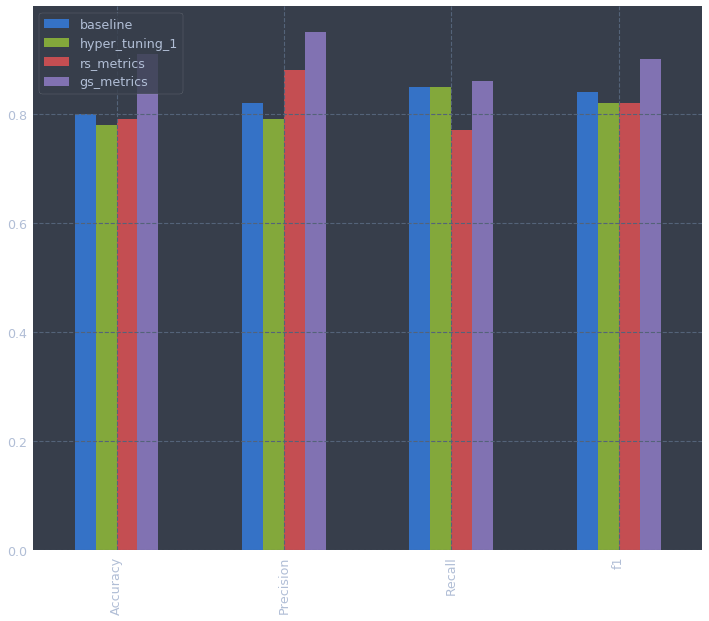

In [51]:
df.plot.bar(figsize = (12, 10));

# 6. Saving and Loading a model
* `Pickle`
* `joblib`

In [52]:
import pickle

# Saving an existing model
pickle.dump(gs_clf, open('gs_random_forest_model.pkl', 'wb'))

In [53]:
# Loading a Saved Model
loaded_model = pickle.load(open('gs_random_forest_model.pkl', 'rb'))

In [54]:
# Trying out the loaded model 

In [55]:
loaded_model_preds = loaded_model.predict(xTest)
evaluate_preds(yTest, loaded_model_preds)

{'Accuracy': 0.82, 'Precision': 0.89, 'Recall': 0.82, 'f1': 0.85}

### JOBLIB - 
`more prefered when model is trained on big numpy arrays , fitted pattern data etc`

In [56]:
from joblib import dump, load
# Saving a model
dump(gs_clf, 'gs_random_forest_model_2.joblib')

['gs_random_forest_model_2.joblib']

In [ ]:
# loading the saved model
joblib_loade